In [24]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('USArrests.csv')
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [13]:
# Separating out the features
x = df.loc[:, ['Murder', 'Assault', 'UrbanPop', 'Rape']].values
# Separating out the target
y = df.loc[:,['Unnamed: 0']].values

# PCA

In [37]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [16]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
finalDf = pd.concat([principalDf, df[['Unnamed: 0']]], axis = 1)

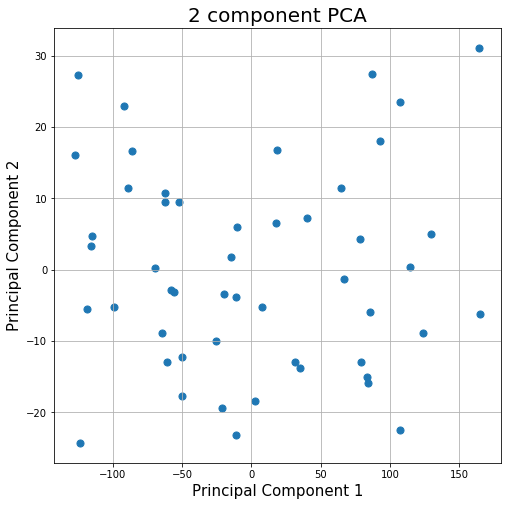

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2']
               , s = 50)
ax.grid()

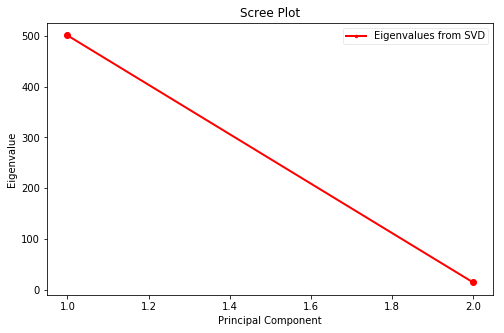

In [30]:
U, S, V = np.linalg.svd(principalDf) 
eigvals = S**2 / np.cumsum(S)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(principalDf.columns)) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False,
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

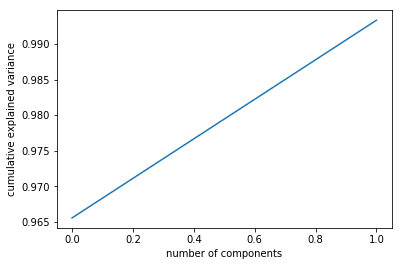

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [32]:
print('NumPy covariance matrix: \n%s' %np.cov(x.T))

NumPy covariance matrix: 
[[  1.89704653e+01   2.91062367e+02   4.38620408e+00   2.29914122e+01]
 [  2.91062367e+02   6.94516571e+03   3.12275102e+02   5.19269061e+02]
 [  4.38620408e+00   3.12275102e+02   2.09518776e+02   5.57680816e+01]
 [  2.29914122e+01   5.19269061e+02   5.57680816e+01   8.77291592e+01]]


In [33]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.04170432  0.04482166 -0.99492173  0.07989066]
 [ 0.99522128  0.05876003  0.0389383  -0.06756974]
 [ 0.04633575 -0.97685748 -0.05816914 -0.20054629]
 [ 0.0751555  -0.20071807  0.07232502  0.97408059]]

Eigenvalues 
[  7.01111485e+03   2.01992366e+02   6.16424618e+00   4.21126508e+01]


In [34]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
7011.11485102
201.992366323
6.16424618416
42.1126507553


In [35]:
print(pca.explained_variance_ratio_ )

[ 0.96553422  0.02781734]


# K-MEANS

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

/opt/conda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:730: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


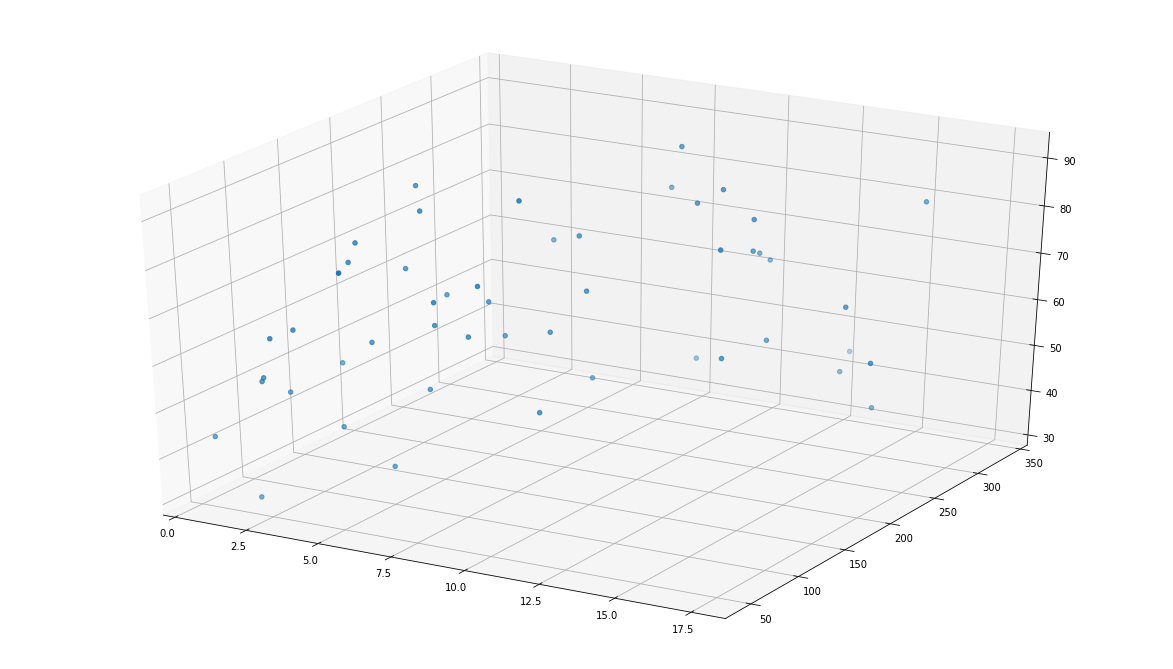

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], x[:, 3])

## 4차원 K-means

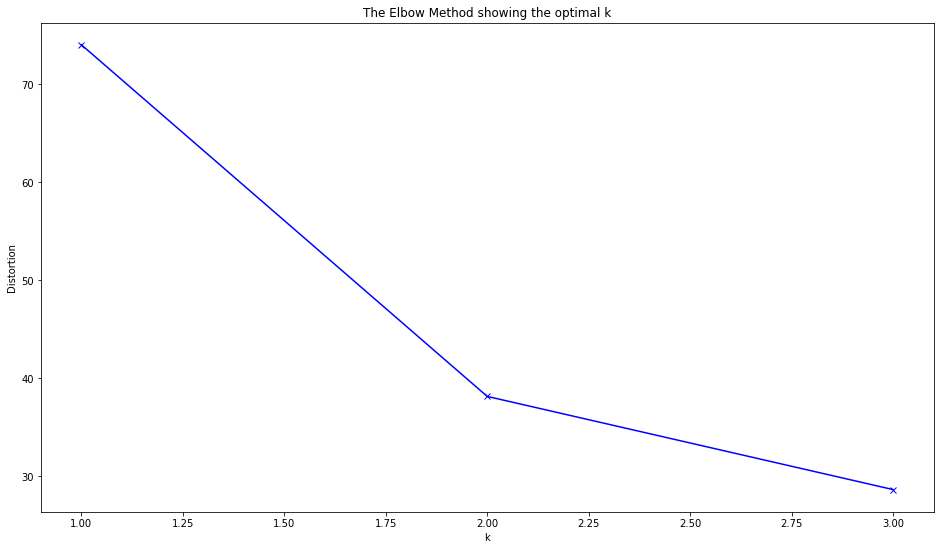

In [74]:
from scipy.spatial.distance import cdist
# k means determine k
distortions = []
K = range(1,4)
for k in K:
    kmeans = KMeans(n_clusters=k)
    # Fitting with inputs
    kmeans = kmeans.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


* K가 2일 경우 CENTROID와 X 값의 거리의 합이 최소화 된다.

In [71]:
# Initializing KMeans
kmeans = KMeans(n_clusters=2)
# Fitting with inputs
kmeans = kmeans.fit(x)
# Predicting the clusters
labels = kmeans.predict(x)
# Getting the cluster centers
C = kmeans.cluster_centers_

/opt/conda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:730: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


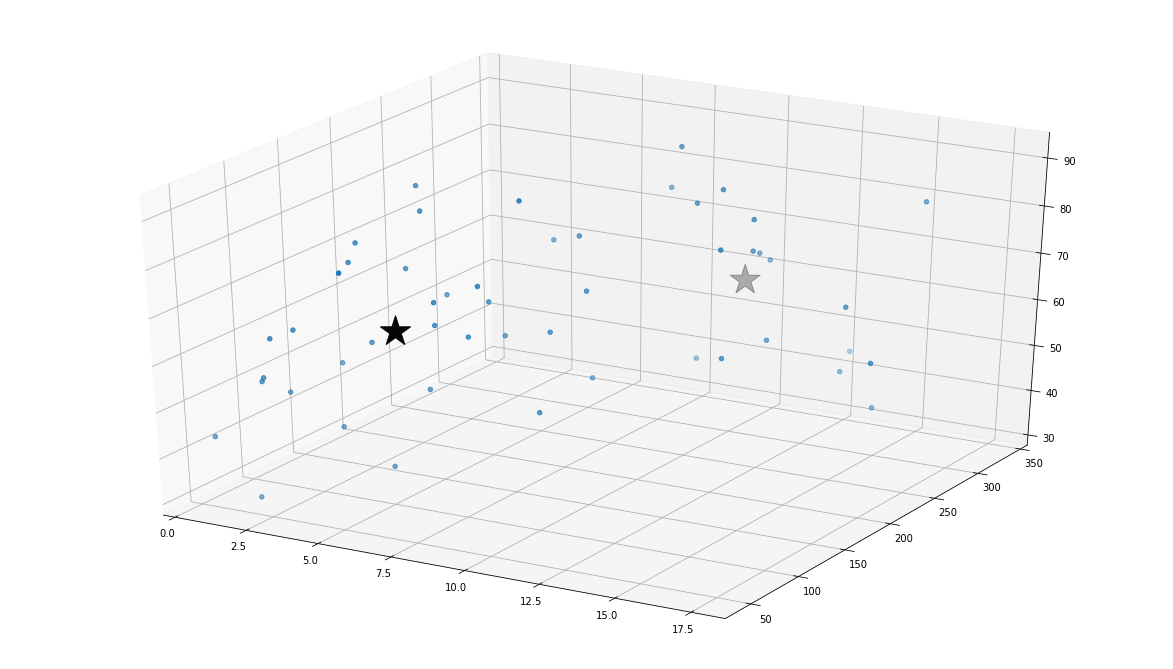

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], x[:, 3])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], marker='*', c='#050505', s=1000)

## 2차원 K-means

In [54]:
X = principalDf.values
# Initializing KMeans
kmeans = KMeans(n_clusters=2)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

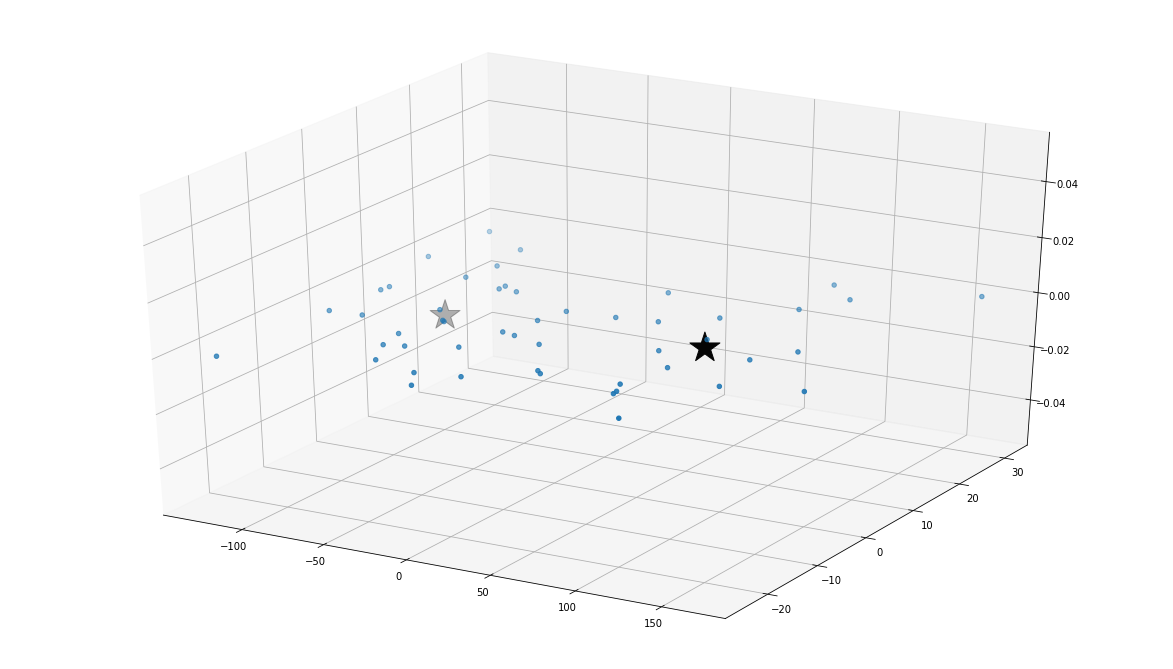

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])
ax.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=1000)

4차원에서 클러스터링 했을 때와 2차원에서 클러스터링 했을 때의 그림을 비교해보면 값들의 특성이 더 잘 분류된 것으로 볼 수 있다.